In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:

d=pd.read_excel("C:\\Users\\Soumyajit Pal Roy\\Desktop\\Project\\Data_Train (6).xlsx")
d

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
d.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
d.shape

(10683, 11)

In [8]:
d.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
d.dropna(inplace=True)

In [10]:
d.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
def change_to_datetime(col):
    d[col]=pd.to_datetime(d[col])

In [12]:
for i in ["Date_of_Journey","Dep_Time","Arrival_Time"]:
    change_to_datetime(i)


In [13]:
d.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [14]:
d

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-02 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-02 05:50:00,2024-08-02 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-02 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-08-02 18:05:00,2024-08-02 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-08-02 16:50:00,2024-08-02 21:35:00,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2024-08-02 19:55:00,2024-08-02 22:25:00,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2024-08-02 20:45:00,2024-08-02 23:20:00,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2024-08-02 08:20:00,2024-08-02 11:20:00,3h,non-stop,No info,7229
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2024-08-02 11:30:00,2024-08-02 14:10:00,2h 40m,non-stop,No info,12648


In [15]:
d["journey_day"]=d["Date_of_Journey"].dt.day
d["journey_month"]=d["Date_of_Journey"].dt.month

In [16]:
d.drop(["Date_of_Journey"],axis=1,inplace=True)

In [17]:
d

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-08-02 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-02 05:50:00,2024-08-02 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-02 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-08-02 18:05:00,2024-08-02 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-08-02 16:50:00,2024-08-02 21:35:00,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2024-08-02 19:55:00,2024-08-02 22:25:00,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,2024-08-02 20:45:00,2024-08-02 23:20:00,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,2024-08-02 08:20:00,2024-08-02 11:20:00,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,2024-08-02 11:30:00,2024-08-02 14:10:00,2h 40m,non-stop,No info,12648,1,3


In [18]:
def extract_hour(data,col):
    data[col+"_hour"]=data[col].dt.hour

def extract_minute(data,col):
    data[col+"_minute"]=data[col].dt.minute



In [19]:
extract_hour(d,"Dep_Time")
extract_minute(d,"Dep_Time")

d.drop(["Dep_Time"],axis=1,inplace=True)

In [20]:
extract_hour(d,"Arrival_Time")
extract_minute(d,"Arrival_Time")
d.drop(["Arrival_Time"],axis=1,inplace=True)

In [21]:
d

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [22]:
d[["Duration_hours","Duration_minute"]]=d["Duration"].str.split(pat=' ',expand=True)

In [23]:
d.drop(["Duration"],axis=1,inplace=True)

In [24]:
d

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2h,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7h,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19h,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5h,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4h,45m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2h,30m
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2h,35m
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3h,None
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2h,40m


In [25]:
d["Duration_hours"]=d["Duration_hours"].str.replace('h','',regex=False).str.strip()
d["Duration_minute"]=d["Duration_minute"].str.replace('m','',regex=False).str.strip()

In [26]:
d

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,None
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [27]:
d["Duration_hours"]=d["Duration_hours"].str.replace(',','',regex=False)

In [28]:
d["Duration_hours"]=d["Duration_hours"].apply(pd.to_numeric,errors='coerce').fillna(0.0)
d["Duration_minute"]=d["Duration_minute"].apply(pd.to_numeric,errors='coerce').fillna(0.0)

In [29]:
d["Duration_hours"]=d["Duration_hours"].astype('int64')
d["Duration_minute"]=d["Duration_minute"].astype('int64')

In [30]:
print(d["Duration_minute"].tolist())

[50, 25, 0, 25, 45, 25, 30, 5, 30, 50, 15, 35, 15, 10, 35, 35, 30, 35, 0, 35, 10, 20, 50, 55, 20, 10, 45, 55, 50, 15, 15, 25, 50, 0, 30, 25, 15, 30, 15, 55, 5, 30, 5, 45, 0, 50, 50, 15, 5, 55, 15, 20, 50, 0, 50, 15, 5, 15, 30, 5, 25, 20, 15, 30, 15, 25, 50, 30, 20, 15, 25, 30, 20, 30, 0, 45, 50, 30, 5, 15, 50, 40, 10, 35, 0, 20, 25, 45, 20, 0, 15, 5, 30, 20, 35, 25, 40, 0, 25, 35, 20, 15, 30, 0, 45, 55, 10, 30, 20, 55, 0, 55, 45, 10, 55, 25, 5, 10, 40, 55, 40, 25, 5, 15, 25, 10, 10, 0, 50, 20, 0, 55, 10, 45, 0, 50, 40, 15, 45, 50, 0, 15, 25, 35, 50, 35, 25, 55, 50, 10, 20, 25, 50, 20, 15, 35, 35, 50, 45, 10, 50, 45, 15, 20, 30, 25, 30, 40, 10, 45, 35, 5, 30, 30, 10, 35, 5, 50, 0, 0, 25, 30, 30, 0, 20, 30, 45, 10, 35, 45, 55, 35, 20, 5, 40, 15, 10, 25, 50, 25, 15, 50, 15, 50, 20, 55, 35, 35, 30, 20, 55, 15, 5, 45, 55, 30, 40, 45, 55, 0, 45, 15, 25, 15, 55, 50, 25, 50, 30, 30, 40, 35, 15, 30, 45, 35, 30, 55, 55, 15, 40, 30, 0, 15, 15, 50, 10, 25, 20, 30, 10, 30, 20, 35, 15, 20, 45, 0, 0,

In [31]:
d.isna().sum()

Airline                0
Source                 0
Destination            0
Route                  0
Total_Stops            0
Additional_Info        0
Price                  0
journey_day            0
journey_month          0
Dep_Time_hour          0
Dep_Time_minute        0
Arrival_Time_hour      0
Arrival_Time_minute    0
Duration_hours         0
Duration_minute        0
dtype: int64

In [32]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Route                10682 non-null  object
 4   Total_Stops          10682 non-null  object
 5   Additional_Info      10682 non-null  object
 6   Price                10682 non-null  int64 
 7   journey_day          10682 non-null  int32 
 8   journey_month        10682 non-null  int32 
 9   Dep_Time_hour        10682 non-null  int32 
 10  Dep_Time_minute      10682 non-null  int32 
 11  Arrival_Time_hour    10682 non-null  int32 
 12  Arrival_Time_minute  10682 non-null  int32 
 13  Duration_hours       10682 non-null  int64 
 14  Duration_minute      10682 non-null  int64 
dtypes: int32(6), int64(3), object(6)
memory usage: 1.1+ MB


In [33]:
d.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int32
journey_month           int32
Dep_Time_hour           int32
Dep_Time_minute         int32
Arrival_Time_hour       int32
Arrival_Time_minute     int32
Duration_hours          int64
Duration_minute         int64
dtype: object

In [34]:
d["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

Text(0.5, 1.0, "How flight's price varies flight company")

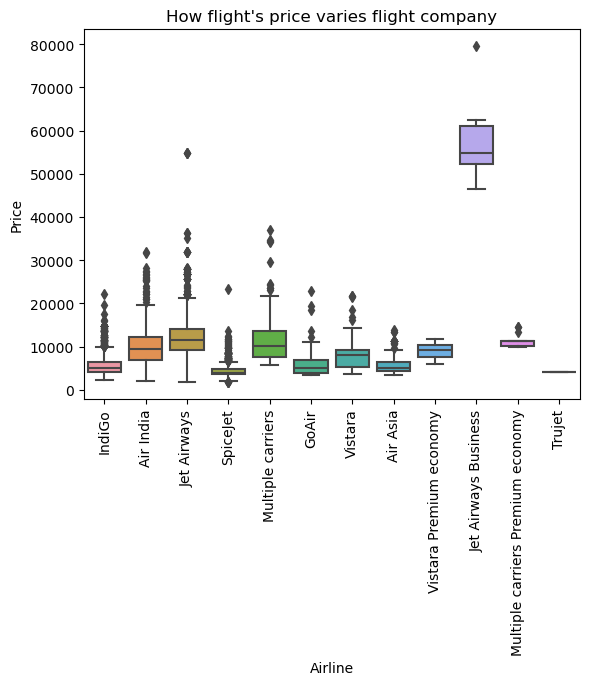

In [35]:
sns.boxplot(x='Airline',y="Price",data=d)
plt.xticks(rotation=90)
plt.title("How flight's price varies flight company")

In [36]:
Airline=pd.get_dummies(d["Airline"],drop_first=True)

In [37]:
d

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [38]:
Airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,True,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,True,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,True,False


In [39]:
final_d=pd.concat([d,Airline],axis=1)

In [40]:
final_d

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,...,False,True,False,False,False,False,False,False,False,False
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,...,False,False,False,False,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,...,False,False,True,False,False,False,False,False,False,False
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,...,False,True,False,False,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,...,False,False,False,False,False,False,False,False,False,False
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,...,False,False,False,False,False,False,False,False,False,False
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,...,False,False,True,False,False,False,False,False,False,False
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,...,False,False,False,False,False,False,False,False,True,False


In [41]:
final_d=final_d.drop("Airline",axis=1)

In [42]:
Source=pd.get_dummies(d["Source"],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [43]:
Destination=pd.get_dummies(d["Destination"],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [44]:
d["Route"].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [45]:
final_d["Route1"]=d["Route"].str.split("→").str[0]
final_d["Route2"]=d["Route"].str.split("→").str[1]
final_d["Route3"]=d["Route"].str.split("→").str[2]
final_d["Route4"]=d["Route"].str.split("→").str[3]
final_d["Route5"]=d["Route"].str.split("→").str[4]

In [46]:
final_d=final_d.drop("Route",axis=1)

In [47]:
final_d.isnull().sum()

Source                                   0
Destination                              0
Total_Stops                              0
Additional_Info                          0
Price                                    0
journey_day                              0
journey_month                            0
Dep_Time_hour                            0
Dep_Time_minute                          0
Arrival_Time_hour                        0
Arrival_Time_minute                      0
Duration_hours                           0
Duration_minute                          0
Air India                                0
GoAir                                    0
IndiGo                                   0
Jet Airways                              0
Jet Airways Business                     0
Multiple carriers                        0
Multiple carriers Premium economy        0
SpiceJet                                 0
Trujet                                   0
Vistara                                  0
Vistara Pre

In [48]:
for i in ["Route1","Route2","Route3","Route4","Route5"]:
    final_d[i].fillna("None",inplace=True)
     

In [49]:
final_d.isnull().sum()

Source                               0
Destination                          0
Total_Stops                          0
Additional_Info                      0
Price                                0
journey_day                          0
journey_month                        0
Dep_Time_hour                        0
Dep_Time_minute                      0
Arrival_Time_hour                    0
Arrival_Time_minute                  0
Duration_hours                       0
Duration_minute                      0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Route1                               0
Route2                   

In [50]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [51]:
for i in ["Route1","Route2","Route3","Route4","Route5"]:
   final_d[i]=encoder.fit_transform(final_d[i])

In [52]:
final_d

,Source,Destination,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,...,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Route1,Route2,Route3,Route4,Route5
0,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,...,False,False,False,False,False,0,13,29,13,5
1,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,...,False,False,False,False,False,2,25,1,3,5
2,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,...,False,False,False,False,False,3,32,4,5,5
3,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,...,False,False,False,False,False,2,34,3,13,5
4,Banglore,New Delhi,1 stop,No info,13302,1,3,16,50,21,...,False,False,False,False,False,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Kolkata,Banglore,non-stop,No info,4107,9,4,19,55,22,...,False,False,False,False,False,2,5,29,13,5
10679,Kolkata,Banglore,non-stop,No info,4145,27,4,20,45,23,...,False,False,False,False,False,2,5,29,13,5
10680,Banglore,Delhi,non-stop,No info,7229,27,4,8,20,11,...,False,False,False,False,False,0,13,29,13,5
10681,Banglore,New Delhi,non-stop,No info,12648,1,3,11,30,14,...,False,False,False,True,False,0,13,29,13,5


In [53]:
final_d["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [54]:
dict={'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4}
final_d["Total_Stops"]=final_d["Total_Stops"].map(dict)

In [55]:
final_d

,Source,Destination,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,...,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Route1,Route2,Route3,Route4,Route5
0,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,...,False,False,False,False,False,0,13,29,13,5
1,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,...,False,False,False,False,False,2,25,1,3,5
2,Delhi,Cochin,2,No info,13882,9,6,9,25,4,...,False,False,False,False,False,3,32,4,5,5
3,Kolkata,Banglore,1,No info,6218,12,5,18,5,23,...,False,False,False,False,False,2,34,3,13,5
4,Banglore,New Delhi,1,No info,13302,1,3,16,50,21,...,False,False,False,False,False,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Kolkata,Banglore,0,No info,4107,9,4,19,55,22,...,False,False,False,False,False,2,5,29,13,5
10679,Kolkata,Banglore,0,No info,4145,27,4,20,45,23,...,False,False,False,False,False,2,5,29,13,5
10680,Banglore,Delhi,0,No info,7229,27,4,8,20,11,...,False,False,False,False,False,0,13,29,13,5
10681,Banglore,New Delhi,0,No info,12648,1,3,11,30,14,...,False,False,False,True,False,0,13,29,13,5


In [56]:
final_d=final_d.drop("Source",axis=1)
final_d=final_d.drop("Destination",axis=1)

In [57]:
final_d=final_d.drop("Additional_Info",axis=1)

In [58]:
final_d=pd.concat([final_d,Source],axis=1)
final_d=pd.concat([final_d,Destination],axis=1)

In [59]:
final_d.dtypes

Total_Stops                          int64
Price                                int64
journey_day                          int32
journey_month                        int32
Dep_Time_hour                        int32
Dep_Time_minute                      int32
Arrival_Time_hour                    int32
Arrival_Time_minute                  int32
Duration_hours                       int64
Duration_minute                      int64
Air India                             bool
GoAir                                 bool
IndiGo                                bool
Jet Airways                           bool
Jet Airways Business                  bool
Multiple carriers                     bool
Multiple carriers Premium economy     bool
SpiceJet                              bool
Trujet                                bool
Vistara                               bool
Vistara Premium economy               bool
Route1                               int32
Route2                               int32
Route3     

In [60]:
final_d

,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minute,...,Route5,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,5,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,...,5,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,...,5,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,...,5,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,...,5,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,...,5,False,False,True,False,False,False,False,False,False
10679,0,4145,27,4,20,45,23,20,2,35,...,5,False,False,True,False,False,False,False,False,False
10680,0,7229,27,4,8,20,11,20,3,0,...,5,False,False,False,False,False,True,False,False,False
10681,0,12648,1,3,11,30,14,10,2,40,...,5,False,False,False,False,False,False,False,False,True


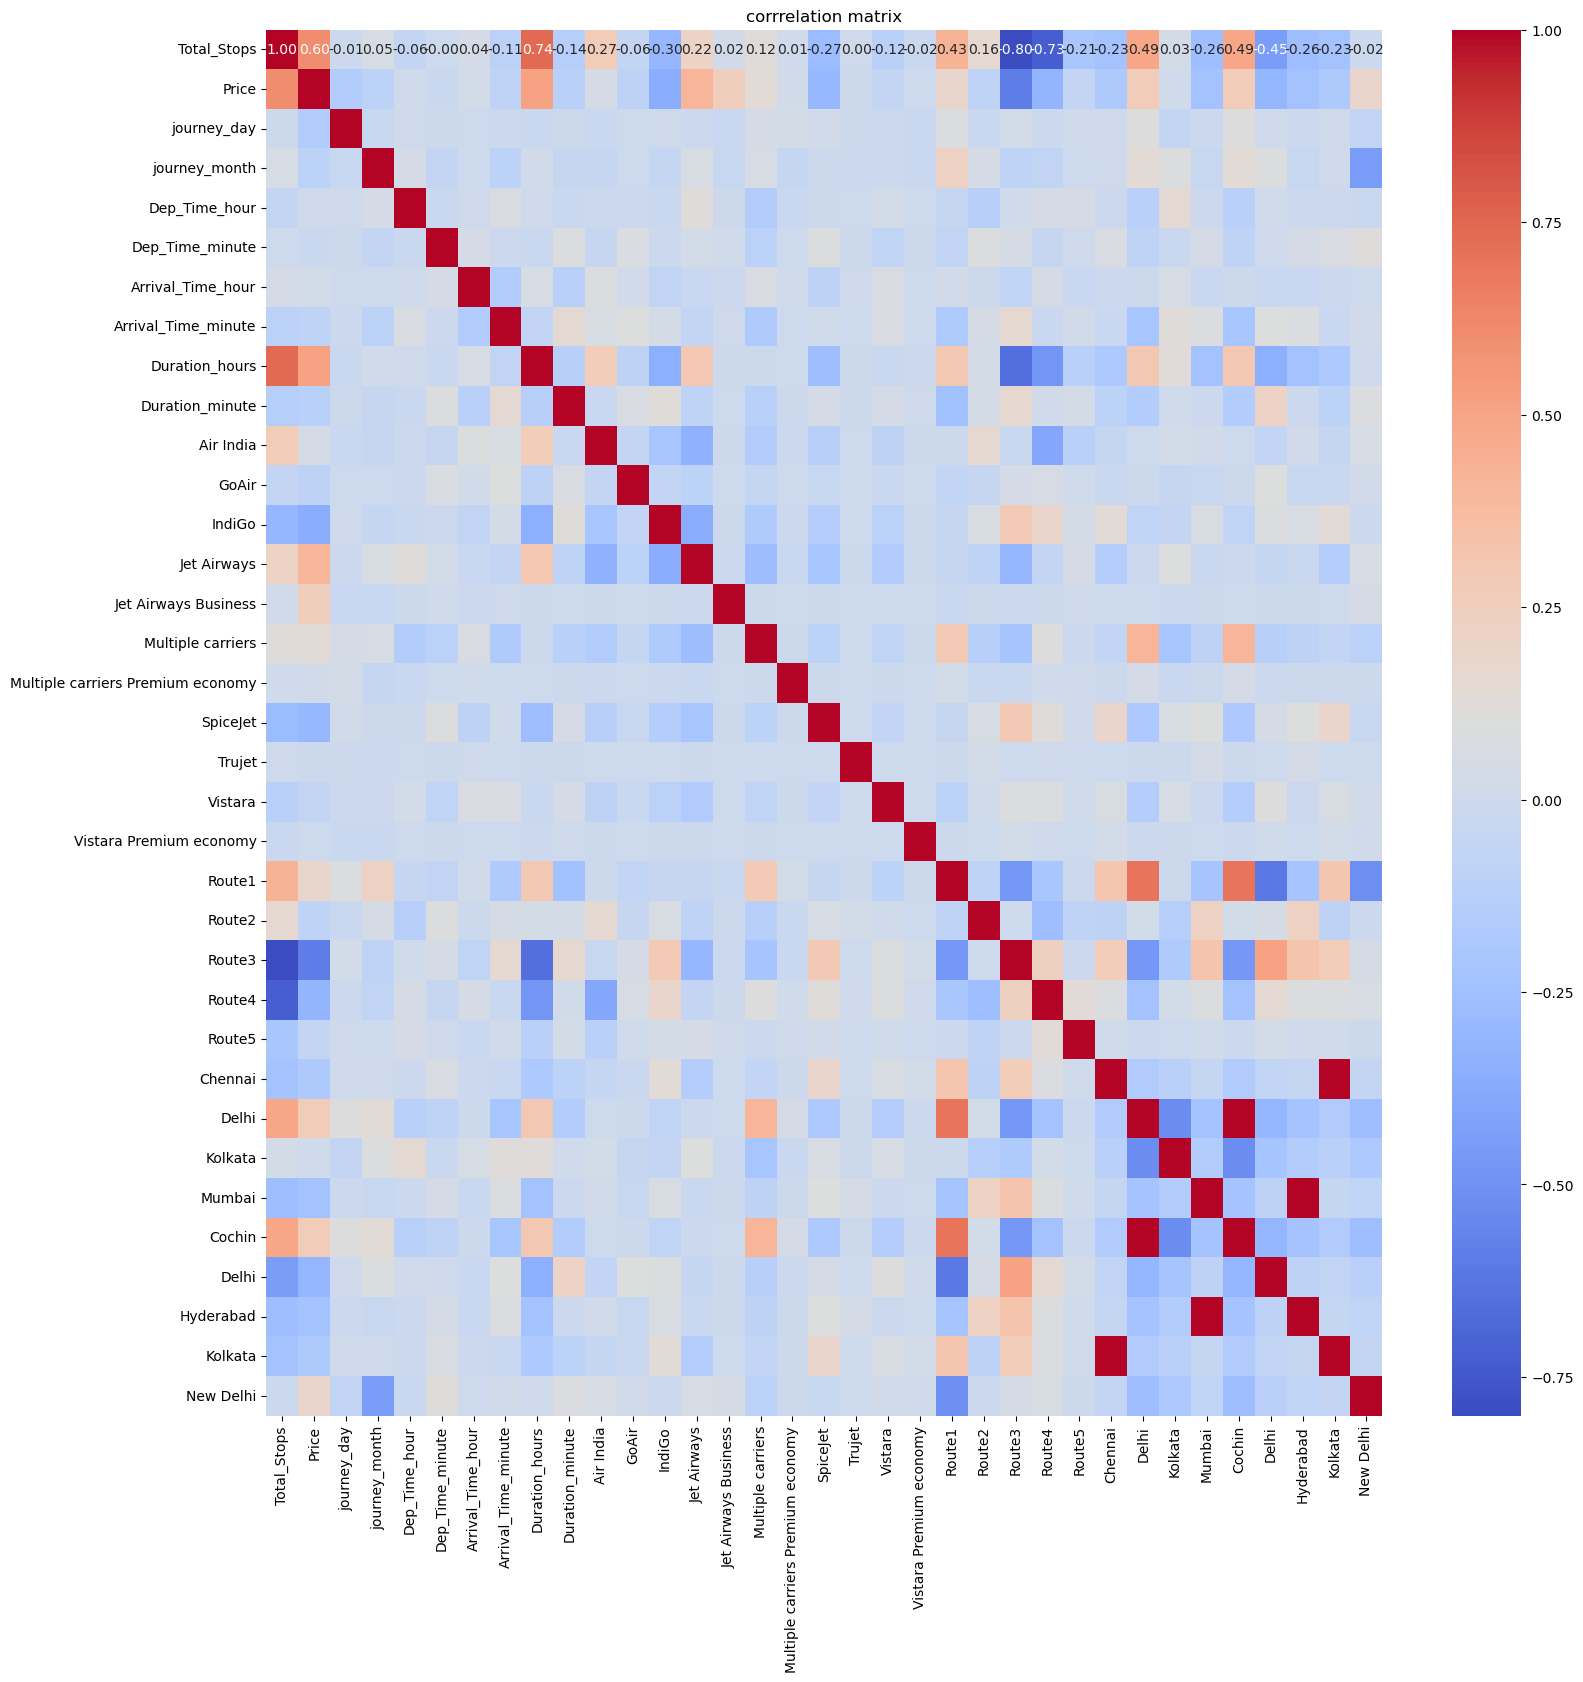

In [61]:
plt.figure(figsize=(18,18))
sns.heatmap(final_d.corr(),annot=True,cmap="coolwarm",fmt="0.2f")
plt.title("corrrelation matrix")
plt.show()

In [62]:
all_columns=final_d.columns
print(all_columns)

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hours', 'Duration_minute', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Route1', 'Route2', 'Route3', 'Route4',
       'Route5', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Cochin', 'Delhi',
       'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')


In [63]:
final_d.head()

,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minute,...,Route5,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,5,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,...,5,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,...,5,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,...,5,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,...,5,False,False,False,False,False,False,False,False,True


In [64]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

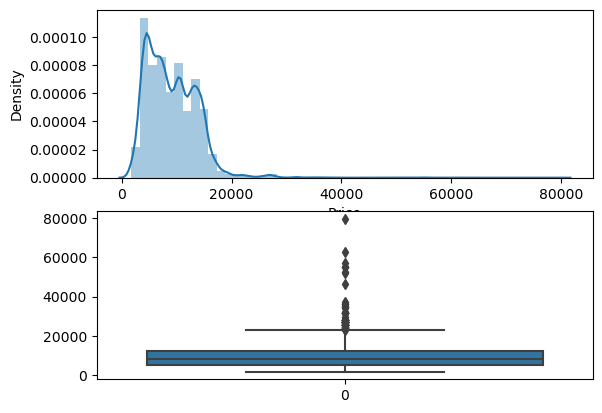

In [65]:
plot(final_d,"Price")

In [66]:
final_d["Price"]=np.where(final_d["Price"]>=40000,final_d["Price"].median(),final_d["Price"])

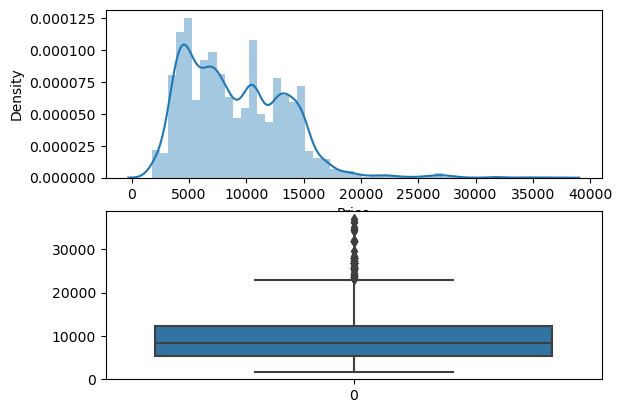

In [67]:
plot(final_d,"Price")

In [68]:
final_d.isnull().sum()

Total_Stops                          0
Price                                0
journey_day                          0
journey_month                        0
Dep_Time_hour                        0
Dep_Time_minute                      0
Arrival_Time_hour                    0
Arrival_Time_minute                  0
Duration_hours                       0
Duration_minute                      0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Route1                               0
Route2                               0
Route3                               0
Route4                               0
Route5                   

In [69]:
x=final_d.drop('Price',axis=1)

In [70]:
y=final_d['Price']

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=123)

In [72]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def Predict(ml_model):
    print(f"Model is: {ml_model}")
    model=ml_model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"Predictions are: {y_pred}")
    print("/n")
    r2score=r2_score(y_pred,y_test)
    print(f"r2 score is {r2score}")
    mean_absoluteerror=mean_absolute_error(y_pred,y_test)
    print(f"mean absolute error  {mean_absoluteerror}")
    mean_squarederror=mean_squared_error(y_pred,y_test)
    print(f"mean squared error  {mean_squarederror}")
    print(f"RMSE  {np.sqrt(mean_squarederror)}")
    sns.distplot(y_test-y_pred)

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR

Model is: RandomForestRegressor()
Predictions are: [ 8541.085      17240.16       13830.88669048 ...  3826.56
  5704.9        10755.908     ]
/n
r2 score is 0.818527691879179
mean absolute error  1075.346102728603
mean squared error  2948566.6611452177
RMSE  1717.1390919623307


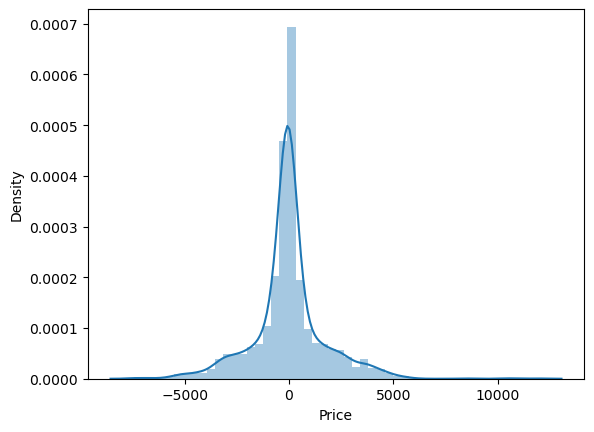

In [139]:
Predict(RandomForestRegressor())

Model is: GradientBoostingRegressor()
Predictions are: [ 5304.62350438 17247.90864471 11919.44380805 ...  4554.09160992
  6449.13234004 11915.85278629]
/n
r2 score is 0.7273890287919844
mean absolute error  1420.260057289248
mean squared error  3625649.371996664
RMSE  1904.1138022704063


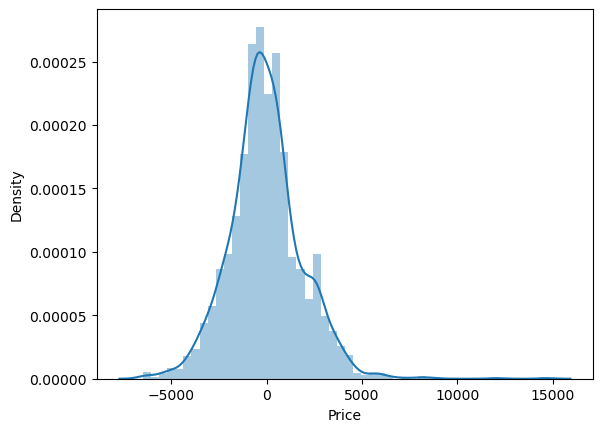

In [135]:
Predict(GradientBoostingRegressor())

Model is: DecisionTreeRegressor()
Predictions are: [ 8996. 18550. 14571. ...  3943.  6069. 10262.]
/n
r2 score is 0.7205738714967405
mean absolute error  1229.5382155669943
mean squared error  5230763.258423023
RMSE  2287.086193920776


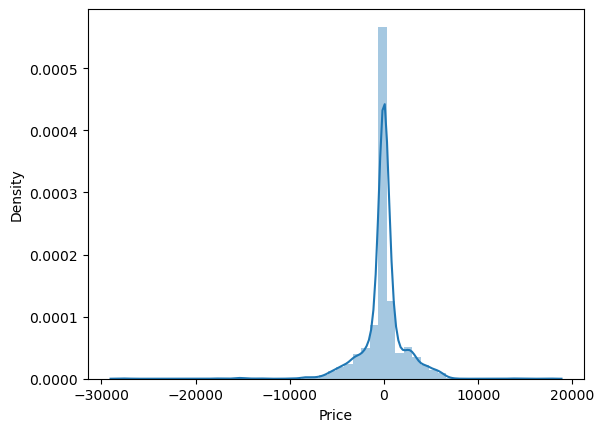

In [136]:
Predict(DecisionTreeRegressor())

Model is: SVR()
Predictions are: [8514.79544565 8264.49239998 8450.57786612 ... 8298.01421834 8458.91315817
 8543.94441179]
/n
r2 score is -197.37062811575893
mean absolute error  3301.5337040582685
mean squared error  16868205.942286246
RMSE  4107.092151667192


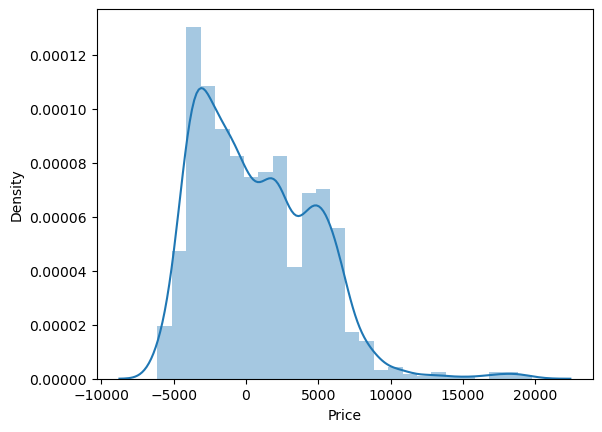

In [137]:
Predict(SVR())

Model is: KNeighborsRegressor()
Predictions are: [ 8355.4 16362.4 12933.2 ...  3757.   8408.  11232.4]
/n
r2 score is 0.5623771884390043
mean absolute error  1640.3838090781471
mean squared error  5997616.504314459
RMSE  2449.0031654357776


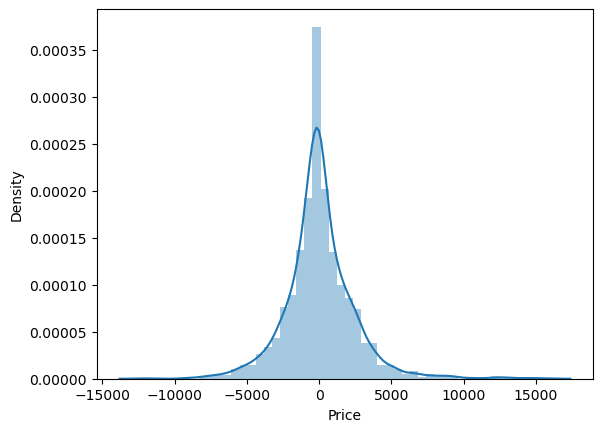

In [138]:
Predict(KNeighborsRegressor())